IMPLEMENTING MULTICLASS CLASSIFICATION USING TENSORFLOW

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

In [2]:
#here we are going to make 4 classes 

classes = 4
m = 100   #number of training samples
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
x_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)
print(y_train)

#make_blobs creates random points in the feature space centred around specified centres having different classes


[3 3 3 0 3 3 3 3 2 0 2 1 1 1 0 3 2 3 1 2 3 0 1 2 2 0 3 1 0 0 3 0 3 2 3 1 1
 2 3 0 0 2 3 0 3 1 1 3 3 0 0 2 0 2 2 0 0 3 3 2 0 0 0 1 2 1 1 1 3 1 1 2 3 0
 1 2 2 0 1 1 2 2 2 1 1 0 1 0 2 3 3 0 2 1 2 1 1 2 2 0]


In [3]:
print(x_train.shape)

(100, 2)


In [5]:
print(x_train)

[[ 4.33348269e+00 -1.99457378e+00]
 [ 4.09621714e+00 -2.31200233e+00]
 [ 4.50331996e+00 -2.19036585e+00]
 [-5.39786744e+00  3.01912738e+00]
 [ 4.21502028e+00 -3.09746680e-02]
 [ 3.76219535e+00 -3.61088073e+00]
 [ 7.18534087e+00 -2.75526173e+00]
 [ 5.43523388e+00 -1.41441859e+00]
 [ 1.59964428e+00  1.62736685e+00]
 [-5.02919272e+00  3.39405598e+00]
 [ 1.22928708e+00  6.31840869e-01]
 [-1.21722350e+00 -3.79323790e+00]
 [-3.05731214e+00 -3.28411722e+00]
 [-1.67684660e+00 -2.99183439e+00]
 [-3.57449011e+00  1.33524488e+00]
 [ 4.59607369e+00 -9.70004663e-01]
 [ 3.82586965e-02  2.95471729e+00]
 [ 4.15508117e+00 -3.47639136e+00]
 [-7.31972218e-01 -2.28202225e+00]
 [ 5.90322174e-01  2.57738073e+00]
 [ 4.07547460e+00 -1.63331438e+00]
 [-5.28564551e+00  2.53836748e+00]
 [-3.16328237e+00 -2.02133510e+00]
 [ 1.93214796e+00  6.09225037e-01]
 [ 1.47323142e+00  2.38011570e+00]
 [-3.61615283e+00  2.76038508e+00]
 [ 5.05884045e+00 -6.77474398e-03]
 [-2.25993484e+00 -1.43370657e+00]
 [-5.38701647e+00  7

In [7]:
#now buliding the NN which will have only 1 hidden layer and the output layer will have 4 units since there are
#4 classes and SparseCategoricalCrossentropy as we want each class to be associated to its neuron's index

tf.random.set_seed(1234)   #done to achieve consistent results

model = Sequential([
    Dense(units=2, activation='relu', name='L1'),
    Dense(units=4, activation='linear', name='L2')
])


In [8]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

model.fit(x_train, y_train, epochs=200)   #using mini batch GD, here the standard batch_size is 32 hence the params are updated
#after every np.ceil(100/32) which is 4, again np.ceil is considered since by using np.floor some data points may 
#not be taken into consideration.

#tf models generally use mini_batch GD

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.6473
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5904 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 2.5525
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5200 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4903  
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4621  
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4349 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4087 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3835 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3586
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3340 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3101 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2872 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2645 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2419 
Epoch 16/200
4/4 

In [9]:
model1 = Sequential([
    Dense(units=2, activation='relu', name='L1'),
    Dense(units=4, activation='linear', name='L2')
])


In [11]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer=tf.keras.optimizers.Adam(0.01)) 

model1.fit(x_train, y_train, epochs=200)   #using AO

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1989
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9816 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8054 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6528 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5202 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4056 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3072 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2231 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1514 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0903 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0376  
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9914  
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9502 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9128 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8781
Epoch 16/200
4/4 ━

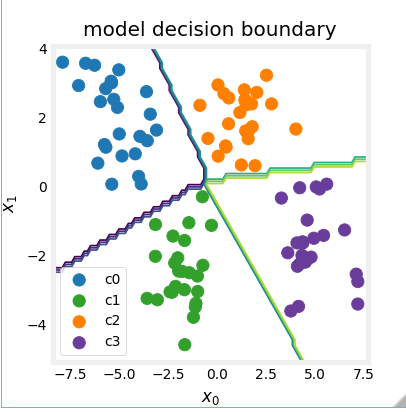

this is how the model is able to draw different decision boundaries in the feature space and such decision
boundaries are only possible while using NN

looking at what the NN does under the hood

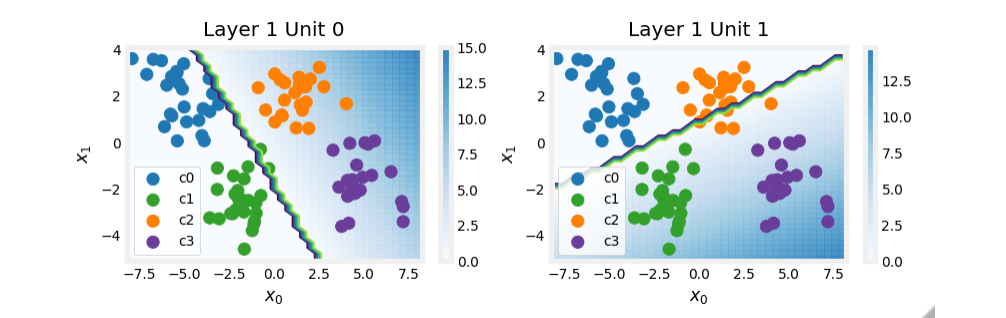

also the decision boundary in the input space corresponds to the line of inflection in the output space where we have a relu plane, this was similar to the logistic regression case where we had a sigmoid graph in the output space and the decision line was obtained corresponding to it in the feature space

here we see that the first neuron in the first layer was able to classify between classes 0,1 and 2,3 and the second neuron of the same layer was able to do it between 0,2 and 1,3, and from the first layer we get new features a10, a11 which are then fed into the second layer. Now looking at this new feature space outputted from the first layer

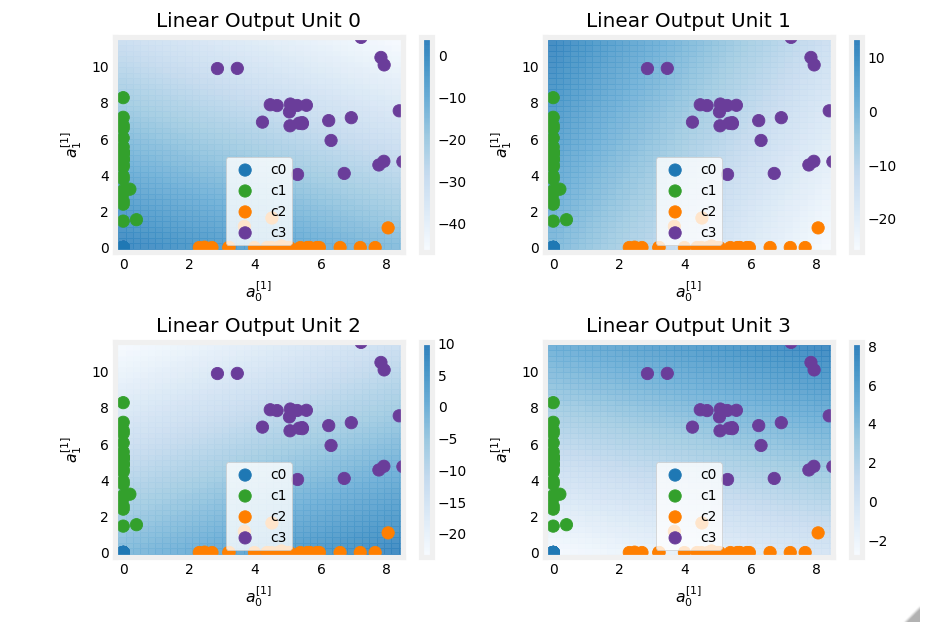

we see that for the first neuron in output layer, higher values of w.a1 + b are obtained in the lower left corner which rightly corresponds to the points of class 0, and this is the same trend for the other neurons too where the dark shade implies higher linear values 